# Практическая работа №2: Исследование задач о раскрасках

Выполнил студент гр. 0304 Крицын Данила, вариант 37.

## Цель работы

Формирование представления о задачах о раскрасках, выработать умение использование леммы Бёрнсайда для решения задачи о раскрасках, привить навык использования систем компьютерной алгебры для реализации алгоритмов решения задачи.

## Основные теоретические положения

### Симметрические группы

Пусть существует $ M = \{1, 2, ..., n\} $ - конечное множество из n элементов.

Группа $ S_n = S(M) $ всех биективных отображений $M$ на себя с операцией умножение (композиции) называется **симметрической группой** степени $n$.

* $ |S_n| = n! $
* Элементы симметрической группы обозначаются следующим образом:
$$ \sigma = \begin{pmatrix} 1 & 2 & ... & n \\ i_1 & i_2 & ... & i_n \end{pmatrix},$$где
$$ i_k = \sigma (i), \quad k = 1, 2, ..., n. $$
* Из того, что подстановки биективны, следует, что строка образов
$$ \left( i_1 i_2 ... i_n \right) $$
содержит все $m \in M$.
* Подстановки $\sigma, \tau \in S_n$ умножаются следующим образом:
$$\sigma \tau (i) = \sigma \cdot \tau (i) = \sigma (\tau (i)) $$
* Нейтральным элементом является тождественная подстановка $ e(i) = i $
* Обратным элементом является подстановка

${\sigma}^{-1}, $ где $i = {\sigma}^{-1}(i_k), \quad k = 1, 2, ..., n. $

### Циклы

Подстановка называется **циклом** длины $k$, если на подмножестве $\{a_{i1}, a_{i2}, ..., a_{ik} \} \subseteq M$, если

$\begin{pmatrix} a_{i1} & a_{i2} & ... & a_{ik-1} & a_{ik} \\ a_{i2} & a_{i3} & ... & a_{ik} & a_{i1} \end{pmatrix}$, а остальные $m \in M$ она не изменяет.

* Два цикла независимы, если они действуют на неперескающиеся подмножества $M$.
* Пусть $\sigma$ - цикл длины $k$. Тогда он порождает в $S_n$ циклическую подгруппу $<\sigma> = \{e, \sigma, {\sigma}^2, ..., {\sigma}^{k-1}\}$ порядка $k$.
* $({\sigma}^S)^{-1} = {\sigma}^{k - S}$

**Теорема**.
Каждая подстановка $\sigma \neq e$ в $S_n$ является произведением независимых циклов (однозначно до порядка циклов).

**Следствие**.
Порядок подстановки $\sigma$ равен НОК длин независимых циклов, входящих в разложение $\sigma$. Поядок подстановки является порядком циклической подгруппы $<\sigma>$.

### Орбита элемента

Пусть $G$ - группа с нейтральным элементом $e$, а $X$ - какое-то множество.

Будем говорить, что $G$ действует на $X$, если задана операция, для $x \in X$, и $g, h \in G$, такая, что:
* $ex = x$
* $gh(x) = g(h(x))$

**Орбитой** элемента $x \in X$ под действием $G$ называется множество $G_x = \{gx : g \in G\}$.

Число $|G_x|$ называется длиной орбиты.

**Неподвижными точками** элемента $g \in G$ называются точки $x \in X$, для которых $gx = x$. Множество неподвижных точек элемента $g$ обозначается $X^g$.

### Лемма Бёрнсайда

Количество орбит действия группы $G$ на множестве $X$ равно
$$N = {{1} \over {|G|}} \sum_{g \in G} |X^g|$$

### Задача о раскрасках

Пусть $I$ - множество каких-то элементов, $C$ - множество цветов.

**Раскраской** множества $I$ называется функция $f : I \to C$.

Множество всех раскрасок обозначается $C^I$.

Количество всех раскрасок равно $|C|^{|I|}$.

**Лемма**:

Пусть $G$ - группа, действующая на множестве $I$.

$gf(i) = f(g^{-1}i)$, где $g \in G, i \in I, f \in C^I$,
задаёт действие $G$ на $C^I$.

**Лемма**:

Для $g \in G$ и функции $f \in C^I$ следующие условия эквивалентны:
* $gf = f$
* $f(i) = f(g^n i)$ для $\forall i \in I$ и $n \in \mathbb{Z}$
* Если $i, j \in I$ лежат в одном цикле в циклической записи перестановки $\varphi (g)$, то $f(i) = f(j)$

**Следствие**:

Количество раскрасок из $C^I$, сохраняющих данный элемент $g \in G$, равно $|C|^{C(\varphi (g))}$, где $c(\sigma)$ - количество независимых циклов.

**Лемма**:
Предположим, $\sigma$ является циклом длины $k$, а $НОД(k, n) = d$. Тогда перестановка ${\sigma}^n$ является произведением $d$ циклов длины $k \over d$.

## Постановка задачи

Аналитически решить задачу о раскрасках; графически отобразить решения задачи с использованием системы компьютерной алгебры SageMath. Полученные результаты содержательно проинтерпретировать.

1. Аналитически решить задачу о раскрасках для заданного варианта. Все умозаключения в ходе решения обосновать и содержательно проинтерпретировать.

Для начала нарисуем данную в задаче фигуру, пронумеровав раскрашиваемые объекты:

```Каждая сторона правильного шестиугольника разбита на 5 равных частей. Через точки деления и вершины проведены отрезки, параллельные сторонам шестиугольника. В получившиеся треугольные клеточки вставляют цветные стёкла 4 различных цветов.```

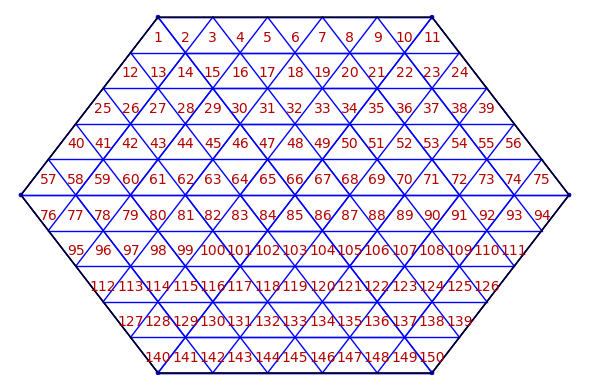

In [3]:
def add_pts(pt1, pt2):
	return (pt1[0] + pt2[0], pt1[1] + pt2[1])
def sub_pts(pt1, pt2):
	return (pt1[0] - pt2[0], pt1[1] - pt2[1])
def div_pt(pt1, x):
	return (pt1[0] / x, pt1[1] / x)

def draw_hexagon(numbers = true, perm = None):
	hex_pts = [(-2.5, 2.5 * sqrt(3)), (2.5, 2.5 * sqrt(3)), (5, 0), (2.5, -2.5 * sqrt(3)), (-2.5, -2.5 * sqrt(3)), (-5, 0), (-2.5, 2.5 * sqrt(3))]
	hexplot = Graphics()

	# draw triangle outlines
	for i in range(len(hex_pts) - 1):
		pt0 = hex_pts[len(hex_pts) - 2 if i == 0 else i - 1]
		pt1 = hex_pts[i]
		pt2 = hex_pts[i + 1]
		pt3 = hex_pts[1 if i == len(hex_pts) - 2 else i + 2]

		step = div_pt(sub_pts(pt2, pt1), 5)
		parline1 = [pt1, pt0]
		parline2 = [pt1, add_pts(pt1, sub_pts(pt3, pt2))]

		hexplot += point(pt0)
		hexplot += point(pt1)
		for j in range(6):
			hexplot += line(parline1)
			parline1 = [add_pts(parline1[0], step), add_pts(parline1[1], step)]
			hexplot += line(parline2)
			parline2 = [add_pts(parline2[0], step), add_pts(parline2[1], step)]

			pt1 = add_pts(pt1, step)

	# draw hexagon itself
	hexplot += line(hex_pts, rgbcolor = (0, 0, 0))

	if numbers:
		# draw triangle numbers
		# upper half
		cur_num = 1
		num_pt = sub_pts(hex_pts[0], (0, 0.5))
		step = div_pt(sub_pts(hex_pts[5], hex_pts[0]), 5)
		for i in range(5):
			num_pt_next = add_pts(num_pt, step)
			for j in range(11 + i * 2):
				hexplot += text(str(cur_num if perm is None else perm[cur_num]), num_pt, rgbcolor = (0.7, 0, 0))
				cur_num += 1
				num_pt = add_pts(num_pt, (0.5, 0))
			num_pt = num_pt_next
		# lower half
		num_pt = sub_pts(hex_pts[5], (-0.5, 0.5))
		step = div_pt(sub_pts(hex_pts[2], hex_pts[1]), 5)
		for i in range(5):
			num_pt_next = add_pts(num_pt, step)
			for j in range(19 - i * 2):
				hexplot += text(str(cur_num if perm is None else perm[cur_num]), num_pt, rgbcolor = (0.7, 0, 0))
				cur_num += 1
				num_pt = add_pts(num_pt, (0.5, 0))
			num_pt = num_pt_next

	return hexplot

draw_hexagon().show(axes = False)

Для начала определим осевую симметрию (по оси OY) в виде перестановки $\sigma$.

Разобъём осевую симметрию на две независимые перестановки, и перемножим их:
$$\sigma = \sigma_u \cdot \sigma_l ,$$
где $\sigma_u$ - перестановка верхней половины шестиугольника, а $\sigma_l$ - перестановка нижней половины.

Представим данные перстановки в виде произведений независимых циклов длины 2 (т.к. в данной фигуре каждая "точка" (треугольник, в который вставляется стекло) имеет противоположную ей по оси симметрии другую точку) и независимых циклов длины 1 для треугольников, которые лежат на оси симметрии (6, 18, 32, ...).
$$\sigma_u = \prod_{i = 1}^5 \prod_{j = i^2 + 8i - 8}^{i^2 + 9i - 5} (j \quad (i^2 + 10i) - (j - (i^2 + 8i - 8)) ) = 
\prod_{i = 1}^5 \prod_{j = i^2 + 8i - 8}^{i^2 + 9i - 5} (j \quad 2i^2 + 18i - 8 - j ) ,$$
$$\sigma_l = \prod_{i = 1}^5 \prod_{j = -i^2 + 22i + 55}^{-i^2 + 21i + 64} (j \quad (-i^2 + 20i + 75) - (j - (-i^2 + 22i + 55)) ) =
\prod_{i = 1}^5 \prod_{j = -i^2 + 22i + 55}^{-i^2 + 21i + 64} (j \quad  -2i^2 + 42i + 130 - j).
$$

*Данные перестановки были выведены из следующих вспомогательных соображений:*

Каждый ряд треугольников (по их номерам) начинается с
$$j_{min} = 1 + {{2\cdot11 + 2(i-2)} \over {2}} (i-1) = i^2 + 8i - 8,$$
исходя из того, что номеру 1 постепенно прибавляются значения 11, 13, 15, и т.д.

Соответственно номер слева от середины такого ряда (так как каждый ряд имеет нечётное количество треугольников) равен
$$j_{max/2} = j + 4 + (i-1) = i^2 + 9i - 5.$$
Высчитаем перестановку $\sigma$ программно:

   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  11  10   9   8   7   6   5   4   3   2   1  24  23  22  21  20  19  18  17  16  15  14  13  12  39

  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  38  37  36  35  34  33  32  31  30  29  28  27  26  25  56  55  54  53  52  51  50  49  48  47  46

  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  45  44  43  42  41  40  75  74  73  72  71  70  69  68  67  66  65  64  63  62  61  60  59  58  57

  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
  94  93  92  91  90  89  88  87  86  85  84  83  82  81  80  79  78  77  76 111 110 109 108 107 106

 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 105 104 103 102 101 100  99  98  97  96  95 126 125 124 123 122 121 120 119 118 117 11

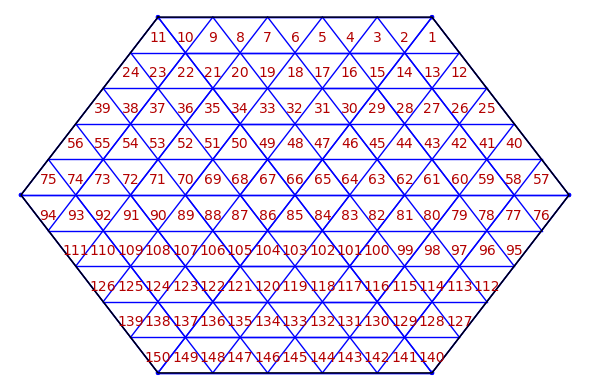

In [5]:
def print_permutation(pm):
	piece_size = 25
	pieces = int(len(pm) / piece_size)
	last_piece = len(pm) % piece_size

	for p in range(pieces):
		for i in range(p * piece_size + 1, p * piece_size + piece_size + 1):
			print("{:-4d}".format(i), end = "")
		print()
		for i in range(p * piece_size + 1, p * piece_size + piece_size + 1):
			print("{:-4d}".format(pm[i]), end = "")
		print("\n")

	for i in range(pieces * piece_size, pieces * piece_size + last_piece - 1):
		print("{:-4d}".format(i), end = "")
	print()
	for i in range(pieces * piece_size, pieces * piece_size + last_piece - 1):
		print("{:-4d}".format(pm[i]), end = "")

def get_symmetry_permutation():
	# start from 1, leave 0 as None
	symm = [None] * 151

	# upper half
	for i in range(1, 6):
		for j in range(i^2 + 8*i - 8, i^2 + 9*i - 5 + 1):
			other = 2*i^2 + 18*i - 8 - j
			symm[j] = other
			symm[other] = j
	# don't forget about triangles lying on the center of symmetry
	for i in range(1, 6):
		symm[i^2 + 9*i - 4] = i^2 + 9*i - 4

	# lower half
	for i in range(1, 6):
		for j in range(-i^2 + 22*i + 55, -i^2 + 21*i + 65 + 1):
			other = -2*i^2 + 42*i + 130 - j
			symm[j] = other
			symm[other] = j
	for i in range(1, 6):
		symm[-i^2 + 21*i + 65] = symm[-i^2 + 21*i + 65]

	return symm


pm_symm = get_symmetry_permutation()
print_permutation(pm_symm)

draw_hexagon(perm = pm_symm).show(axes = False)

Теперь определим поворот шестиугольника в виде перестановки $\tau$.

Представим шестиугольник в виде пяти "слоёв", каждый из которых содержит 6 рядов по $(11 - 2i)$ треугольников каждый, где $i$ - номер слоя в порядке приближения к центру шестиугольника (1 - крайний слой, 5 - ближний слой).
Представим $\tau$ как "перетаскивание" каждого такого ряда на следующий, что будет представлять собой поворот шестиугольника на 60 градусов по часовой стрелке. Соответственно, таких поворотов будет 6:
$$(1) \quad начало: i^2 + 8i - 8 + (1 + 2(i - 1)) = i^2 + 10i - 9$$
$$элементы: i^2 + 10i - 9 \quad i^2 + 10i - 8 \quad i^2 + 10i - 7 \quad ...$$
$$(2) \quad начало: 11 + (11 + (i - 2))(i - 1) = i^2 + 8i + 2$$
$$элементы: i^2 + 8i + 2 \quad i^2 + 8i + 2 + (10 + 2i) \quad i^2 + 8i + 2 + (10 + 2i + 1) \quad i^2 + 8i + 2 + (10 + 2i + 1) + (12 + 2i) \quad ...$$
$$(3) \quad начало: 96 - 2i$$
$$элементы: 96 - 2i \quad 96 - 2i - 1 \quad 96 - 2i - 1 + 18 \quad 96 - 2i - 1 + (18 - 1) \quad 96 - 2i - 1 + (18 - 1) + 16 \quad ...$$
$$(4) \quad начало: 149 - (13 + (i - 2))(i - 1) = -i^2 - 10i + 160$$
$$элементы: -i^2 - 10i + 160 \quad -i^2 - 10i + 159 \quad -i^2 - 10i + 158 \quad ...$$
$$(5) \quad начало: 140 - (11 + (i - 2))(i - 1) = -i^2 - 8i + 149$$
$$элементы: -i^2 - 8i + 149 \quad -i^2 - 8i + 149 - (10 + 2i) \quad -i^2 - 8i + 149 - (10 + 2i + 1) \quad -i^2 - 8i + 149 - (10 + 2i + 1) - (12 + 2i) \quad ...$$
$$(6) \quad начало: 55 + 2i$$
$$элементы: 55 + 2i \quad 55 + 2i + 1 \quad 55 + 2i + 1 - 18 \quad 55 + 2i + 1 - 18 + 1 \quad 55 + 2i + 1 - 18 + 1 - 16 \quad ...$$

Вычислим перестановку $\tau$ программно:

   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  76  57  58  40  41  25  26  12  13   1   2  95  77  78  59  60  42  43  27  28  14  15   3   4 112

  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  96  97  79  80  61  62  44  45  29  30  16  17   5   6 127 113 114  98  99  81  82  63  64  46  47

  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  31  32  18  19   7   8 140 128 129 115 116 100 101  83  84  65  66  48  49  33  34  20  21   9  10

  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 141 142 130 131 117 118 102 103  85  86  67  68  50  51  35  36  22  23  11 143 144 132 133 119 120

 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 104 105  87  88  69  70  52  53  37  38  24 145 146 134 135 121 122 106 107  89  90  7

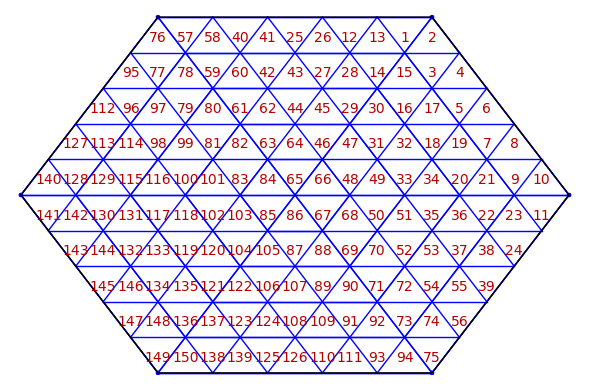

In [6]:
def get_rotation_permutation():
	# start from 1, leave 0 as None
	rot = [0] * 151

	# iterate through each "layer" (inner hexagon)
	rows = [None] * 5
	for i in range(1, 6):
		rows[i - 1] = []
		for j in range(6):
			rows[i - 1].append([None] * (11 - 2*i))

	for i in range(1, 6):
		# 1
		cnt = 1
		cur = i^2 + 10*i - 9
		while True:
			rows[i - 1][0][cnt - 1] = cur
			cur += 1
			cnt += 1
			if cnt >= 11 - 2*i + 1:
				break
		# 2
		cnt = 1
		cur = i^2 + 8*i + 2
		step = 10
		while True:
			rows[i - 1][1][cnt - 1] = cur
			cur += (step + 2*i)
			cnt += 1
			step += 2
			if cnt >= 11 - 2*i + 1:
				break
			rows[i - 1][1][cnt - 1] = cur
			cur += 1
			cnt += 1
			if cnt >= 11 - 2*i + 1:
				break
		# 3
		cnt = 1
		cur = 96 - 2*i
		step = 18
		while True:
			rows[i - 1][2][cnt - 1] = cur
			cur -= 1
			cnt += 1
			if cnt >= 11 - 2*i + 1:
				break
			rows[i - 1][2][cnt - 1] = cur
			cur += step
			cnt += 1
			step -= 2
			if cnt >= 11 - 2*i + 1:
				break
		# 4
		cnt = 1
		cur = -i^2 - 10*i + 160
		while True:
			rows[i - 1][3][cnt - 1] = cur
			cur -= 1
			cnt += 1
			if cnt >= 11 - 2*i + 1:
				break
		# 5
		cnt = 1
		cur = -i^2 - 8*i + 149
		step = 10
		while True:
			rows[i - 1][4][cnt - 1] = cur
			cur -= (step + 2*i)
			cnt += 1
			step += 2
			if cnt >= 11 - 2*i + 1:
				break
			rows[i - 1][4][cnt - 1] = cur
			cur -= 1
			cnt += 1
			if cnt >= 11 - 2*i + 1:
				break
		# 6
		cnt = 1
		cur = 55 + 2*i
		step = 18
		while True:
			rows[i - 1][5][cnt - 1] = cur
			cur += 1
			cnt += 1
			if cnt >= 11 - 2*i + 1:
				break
			rows[i - 1][5][cnt - 1] = cur
			cur -= step
			cnt += 1
			step -= 2
			if cnt >= 11 - 2*i + 1:
				break

	for i in range(1, 6):
		for j in range(11 - 2*i):
			rot[rows[i - 1][1][j]] = rows[i - 1][0][j]
			rot[rows[i - 1][2][j]] = rows[i - 1][1][j]
			rot[rows[i - 1][3][j]] = rows[i - 1][2][j]
			rot[rows[i - 1][4][j]] = rows[i - 1][3][j]
			rot[rows[i - 1][5][j]] = rows[i - 1][4][j]
			rot[rows[i - 1][0][j]] = rows[i - 1][5][j]
	return rot

pm_rot = get_rotation_permutation()
print_permutation(pm_rot)

draw_hexagon(perm = pm_rot).show(axes = False)

Далее найдём все возможные композиции поворотов и симметрий, а именно
$$e, \tau, \tau^2, \tau^3, \tau^4, \tau^5, \sigma, \sigma\tau, \sigma\tau^2, \sigma\tau^3, \sigma\tau^4, \sigma\tau^5$$

In [7]:
def get_permutation_composition(pm1, pm2):
	pm_ret = [None] * len(pm1)
	for i in range(1, len(pm1)):
		pm_ret[i] = pm1[pm2[i]]
	return pm_ret

e = [None]
for i in range(1, 151):
    e.append(i)
    
pm_rot2 = get_permutation_composition(pm_rot, pm_rot)
pm_rot3 = get_permutation_composition(pm_rot, pm_rot2)
pm_rot4 = get_permutation_composition(pm_rot, pm_rot3)
pm_rot5 = get_permutation_composition(pm_rot, pm_rot4)

pm_symmrot = get_permutation_composition(pm_symm, pm_rot)
pm_symmrot2 = get_permutation_composition(pm_symm, pm_rot2)
pm_symmrot3 = get_permutation_composition(pm_symm, pm_rot3)
pm_symmrot4 = get_permutation_composition(pm_symm, pm_rot4)
pm_symmrot5 = get_permutation_composition(pm_symm, pm_rot5)

print("e =")
print_permutation(e)
print("τ =")
print_permutation(pm_rot)
print("τ^2 =")
print_permutation(pm_rot2)
print("τ^3 =")
print_permutation(pm_rot3)
print("τ^4 =")
print_permutation(pm_rot4)
print("τ^5 =")
print_permutation(pm_rot5)
print("σ =")
print_permutation(pm_symm)
print("στ =")
print_permutation(pm_symmrot)
print("στ^2 =")
print_permutation(pm_symmrot2)
print("στ^3 =")
print_permutation(pm_symmrot3)
print("στ^4 =")
print_permutation(pm_symmrot4)
print("στ^5 =")
print_permutation(pm_symmrot5)

e =
   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25

  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50

  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75

  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100

 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 12

  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  40  41  42  43  44  45

 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
  46  47  48  49  50  51  52  53  54  55  56  25  26  27  28  29  30  31  32  33  34  35  36  37  38

 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
  39  12  13  14  15  16  17  18  19  20  21  22  23  24   1   2   3   4   5   6   7   8   9  10  11


στ^4 =
   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  57  76  77  95  96 112 113 127 128 140 141  40  58  59  78  79  97  98 114 115 129 130 142 143  25

  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  41  42  60  61  80  81  99 100 116 117 131 132 144 145  12  26  27  43  44  62  63  82  83 101 102

  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  

Наконец разложим получившиеся перестановки в произведения независимых циклов:

In [5]:
import copy

def get_permutation_loops(pm):
	pm_copy = copy.deepcopy(pm)
	loops = []

	for i in range(1, len(pm_copy)):
		if pm_copy[i] == 0:
			continue
		beg = i
		cur = pm_copy[i]
		loops.append([beg])
		while cur != beg:
			loops[-1].append(cur)
			next = pm_copy[cur]
			pm_copy[cur] = 0
			cur = next

	return loops

def print_permutation_loops(pm_loops):
	for l in pm_loops:
		print("(", " ".join(map(str, l)), ") ", end = "")
	print()

e_l = get_permutation_loops(e)
pm_rot_l = get_permutation_loops(pm_rot)
pm_symm_l = get_permutation_loops(pm_symm)
pm_rot2_l = get_permutation_loops(pm_rot2)
pm_rot3_l = get_permutation_loops(pm_rot3)
pm_rot4_l = get_permutation_loops(pm_rot4)
pm_rot5_l = get_permutation_loops(pm_rot5)
pm_symmrot_l = get_permutation_loops(pm_symmrot)
pm_symmrot2_l = get_permutation_loops(pm_symmrot2)
pm_symmrot3_l = get_permutation_loops(pm_symmrot3)
pm_symmrot4_l = get_permutation_loops(pm_symmrot4)
pm_symmrot5_l = get_permutation_loops(pm_symmrot5)

print("e =")
print_permutation_loops(e_l)
print("τ =")
print_permutation_loops(pm_rot_l)
print("τ^2 =")
print_permutation_loops(pm_rot2_l)
print("τ^3 =")
print_permutation_loops(pm_rot3_l)
print("τ^4 =")
print_permutation_loops(pm_rot4_l)
print("τ^5 =")
print_permutation_loops(pm_rot5_l)
print("σ =")
print_permutation_loops(pm_symm_l)
print("στ =")
print_permutation_loops(pm_symmrot_l)
print("στ^2 =")
print_permutation_loops(pm_symmrot2_l)
print("στ^3 =")
print_permutation_loops(pm_symmrot3_l)
print("στ^4 =")
print_permutation_loops(pm_symmrot4_l)
print("στ^5 =")
print_permutation_loops(pm_symmrot5_l)

e =
( 1 ) ( 2 ) ( 3 ) ( 4 ) ( 5 ) ( 6 ) ( 7 ) ( 8 ) ( 9 ) ( 10 ) ( 11 ) ( 12 ) ( 13 ) ( 14 ) ( 15 ) ( 16 ) ( 17 ) ( 18 ) ( 19 ) ( 20 ) ( 21 ) ( 22 ) ( 23 ) ( 24 ) ( 25 ) ( 26 ) ( 27 ) ( 28 ) ( 29 ) ( 30 ) ( 31 ) ( 32 ) ( 33 ) ( 34 ) ( 35 ) ( 36 ) ( 37 ) ( 38 ) ( 39 ) ( 40 ) ( 41 ) ( 42 ) ( 43 ) ( 44 ) ( 45 ) ( 46 ) ( 47 ) ( 48 ) ( 49 ) ( 50 ) ( 51 ) ( 52 ) ( 53 ) ( 54 ) ( 55 ) ( 56 ) ( 57 ) ( 58 ) ( 59 ) ( 60 ) ( 61 ) ( 62 ) ( 63 ) ( 64 ) ( 65 ) ( 66 ) ( 67 ) ( 68 ) ( 69 ) ( 70 ) ( 71 ) ( 72 ) ( 73 ) ( 74 ) ( 75 ) ( 76 ) ( 77 ) ( 78 ) ( 79 ) ( 80 ) ( 81 ) ( 82 ) ( 83 ) ( 84 ) ( 85 ) ( 86 ) ( 87 ) ( 88 ) ( 89 ) ( 90 ) ( 91 ) ( 92 ) ( 93 ) ( 94 ) ( 95 ) ( 96 ) ( 97 ) ( 98 ) ( 99 ) ( 100 ) ( 101 ) ( 102 ) ( 103 ) ( 104 ) ( 105 ) ( 106 ) ( 107 ) ( 108 ) ( 109 ) ( 110 ) ( 111 ) ( 112 ) ( 113 ) ( 114 ) ( 115 ) ( 116 ) ( 117 ) ( 118 ) ( 119 ) ( 120 ) ( 121 ) ( 122 ) ( 123 ) ( 124 ) ( 125 ) ( 126 ) ( 127 ) ( 128 ) ( 129 ) ( 130 ) ( 131 ) ( 132 ) ( 133 ) ( 134 ) ( 135 ) ( 136 ) ( 137 ) ( 138 ) 

Воспользуемся леммой Бёрнсайда. Для этого сначала посчитаем количество независимых циклов для каждой перестановки:

In [6]:
print("|X^e| =", len(e_l))
print("|X^τ| =", len(pm_rot_l))
print("|X^(τ^2)| =", len(pm_rot2_l))
print("|X^(τ^3)| =", len(pm_rot3_l))
print("|X^(τ^4)| =", len(pm_rot4_l))
print("|X^(τ^5)| =", len(pm_rot5_l))
print("|X^σ| =", len(pm_symm_l))
print("|X^στ| =", len(pm_symmrot_l))
print("|X^(στ^2)| =", len(pm_symmrot2_l))
print("|X^(στ^3)| =", len(pm_symmrot3_l))
print("|X^(στ^4)| =", len(pm_symmrot4_l))
print("|X^(στ^5)| =", len(pm_symmrot5_l))

|X^e| = 150
|X^τ| = 25
|X^(τ^2)| = 50
|X^(τ^3)| = 75
|X^(τ^4)| = 50
|X^(τ^5)| = 25
|X^σ| = 80
|X^στ| = 75
|X^(στ^2)| = 80
|X^(στ^3)| = 75
|X^(στ^4)| = 80
|X^(στ^5)| = 75


Наконец воспользуемся самой леммой:
    
$$ N = {1 \over {|G|}} \sum_{g \in G} |X^g| = {1 \over 12} (4^{150} + 4^{25} + 4^{50} + 4^{75} + 4^{50} + 4^{25} + 4^{80} + 4^{75} + 4^{80} + 4^{75} + 4^{80} + 4^{75}) = \quad ... $$

In [7]:
print("N = ", 1/12 * (4^150 + 4^25 + 4^50 + 4^75 + 4^50 + 4^25 + 4^80 + 4^75 + 4^80 + 4^75 + 4^80 + 4^75))

N =  169752998027873840522370474034114846754289398656653251180728093328601981905952584394342400


Итого $N = 169752998027873840522370474034114846754289398656653251180728093328601981905952584394342400$

есть количество уникальных раскрасок для заданного шестиугольника.

2.Реализовать средствами SageMath функцию, отображающую графически раскраску по заданному номеру. Продемонстрировать работу функции на нескольких примерах. Сделать выводы.

Будем отображать раскраску по номеру следующим образом:
* Отнимем от номера раскраски 1.
* Переведём номер раскраски в 4-ичную систему счисления, извлечём из него цифры.
* Каждая цифра полученного номера раскраски в 4-ичной системе счисления будет определять цвет соответствующего стекла, вставленного в шестиугольник.

colouring number #10:


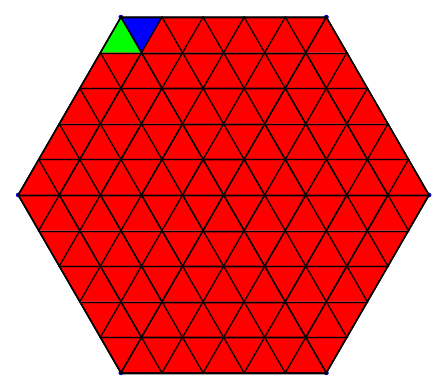

colouring number #1171503101521856512657072350059996863275071406850652089908293893830251906:


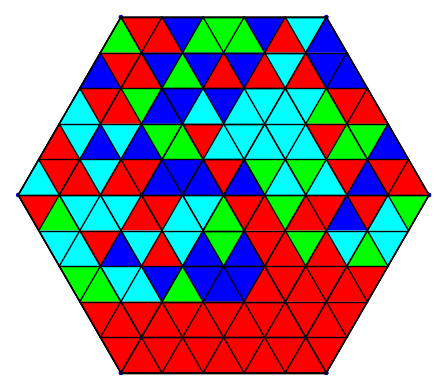

colouring number #1286001101229475178080730017186127931921706903481213274091132789139662188969740893125053103:


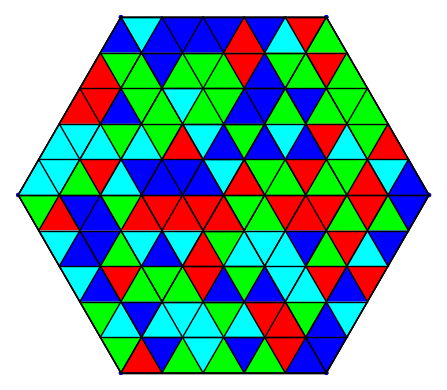

In [30]:
import random

def colouring_num_to_list(num):
    tri_nums = [0] * 150
    cur_tri = 0
    while num > 0:
        tri_nums[cur_tri] = num % 4
        cur_tri += 1
        num = int(num / 4)
    return tri_nums

def get_colouring(num):
    if num < 1 or num > 4^150:
        return None
    num -= 1
    return colouring_num_to_list(num)

def draw_colouring(cl_list):
	hex_pts = [(-2.5, 2.5 * sqrt(3)), (2.5, 2.5 * sqrt(3)), (5, 0), (2.5, -2.5 * sqrt(3)), (-2.5, -2.5 * sqrt(3)), (-5, 0), (-2.5, 2.5 * sqrt(3))]
	hexplot = point((0, 0))

	# draw triangle outlines
	for i in range(len(hex_pts) - 1):
		pt0 = hex_pts[len(hex_pts) - 2 if i == 0 else i - 1]
		pt1 = hex_pts[i]
		pt2 = hex_pts[i + 1]
		pt3 = hex_pts[1 if i == len(hex_pts) - 2 else i + 2]

		step = div_pt(sub_pts(pt2, pt1), 5)
		parline1 = [pt1, pt0]
		parline2 = [pt1, add_pts(pt1, sub_pts(pt3, pt2))]

		hexplot += point(pt0)
		hexplot += point(pt1)
		for j in range(6):
			hexplot += line(parline1, rgbcolor = (0, 0, 0))
			parline1 = [add_pts(parline1[0], step), add_pts(parline1[1], step)]
			hexplot += line(parline2, rgbcolor = (0, 0, 0))
			parline2 = [add_pts(parline2[0], step), add_pts(parline2[1], step)]

			pt1 = add_pts(pt1, step)

	# draw hexagon itself
	hexplot += line(hex_pts, rgbcolor = (0, 0, 0))

	# draw coloured triangles
	step1 = div_pt(sub_pts(hex_pts[5], hex_pts[0]), 5)
	step2 = div_pt(sub_pts(hex_pts[2], hex_pts[1]), 5)
	rgbcolours = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (0, 1, 1)]
	trignum = 0

	# upper half
	for i in range(5):
		trig_pts1 = [hex_pts[0], add_pts(hex_pts[0], step1), add_pts(hex_pts[0], step2)]
		trig_pts2 = [hex_pts[0], add_pts(hex_pts[0], (1, 0)), add_pts(hex_pts[0], step2)]
		for j in range(3):
			for k in range(i):
				trig_pts1[j] = add_pts(trig_pts1[j], step1)
				trig_pts2[j] = add_pts(trig_pts2[j], step1)

		for j in range(11 + 2*i):
			if j % 2 == 0:
				hexplot += polygon(trig_pts1, rgbcolor = rgbcolours[cl_list[trignum]])
				for k in range(3):
					trig_pts1[k] = add_pts(trig_pts1[k], (1, 0))
			else:
				hexplot += polygon(trig_pts2, rgbcolor = rgbcolours[cl_list[trignum]])
				for k in range(3):
					trig_pts2[k] = add_pts(trig_pts2[k], (1, 0))
			trignum += 1

	# lower half
	for i in range(5):
		trig_pts1 = [hex_pts[5], add_pts(hex_pts[5], (1, 0)), add_pts(hex_pts[5], step2)]
		trig_pts2 = [add_pts(hex_pts[5], (1, 0)), add_pts(hex_pts[5], step2), add_pts(add_pts(hex_pts[5], step2), (1, 0))]
		for j in range(3):
			for k in range(i):
				trig_pts1[j] = add_pts(trig_pts1[j], step2)
				trig_pts2[j] = add_pts(trig_pts2[j], step2)

		for j in range(19 - 2*i):
			if j % 2 == 0:
				hexplot += polygon(trig_pts1, rgbcolor = rgbcolours[cl_list[trignum]])
				for k in range(3):
					trig_pts1[k] = add_pts(trig_pts1[k], (1, 0))
			else:
				hexplot += polygon(trig_pts2, rgbcolor = rgbcolours[cl_list[trignum]])
				for k in range(3):
					trig_pts2[k] = add_pts(trig_pts2[k], (1, 0))
			trignum += 1

	return hexplot

random.seed(0xdeadbeef)
cnum = random.randint(8, 128)
print("colouring number #", cnum, ":", sep = "")
draw_colouring(get_colouring(cnum)).show(axes = False)
cnum = random.randint(1, 4^120)
print("colouring number #", cnum, ":", sep = "")
draw_colouring(get_colouring(cnum)).show(axes = False)
cnum = random.randint(4^149, 4^150)
print("colouring number #", cnum, ":", sep = "")
draw_colouring(get_colouring(cnum)).show(axes = False)

3.Решим задачу в общем виде.

Для этого зададим параметр $n \in \mathbb{N}, n \ge 2$ - количество частей, на которые разбивается каждая сторона шестиугольника.

Кроме того, изменим нумерацию треугольников. Пусть номер треугольника возрастает в зависимости от его положения в одной из "цепочек" треугольников, начиная от самой внутренней (из 6 треугольников) и заканчивая внешней (из $6 + 12(n - 1)$ треугольников). Таким образом, $i$-ая "цепочка" будет состоять из номеров
$$6(i-1)^2 + 1\quad 6(i-1)^2 + 2 \quad ... \quad 6(i-1)^2 + 12(i-1) + 6.$$
Представим нумерацию графически:

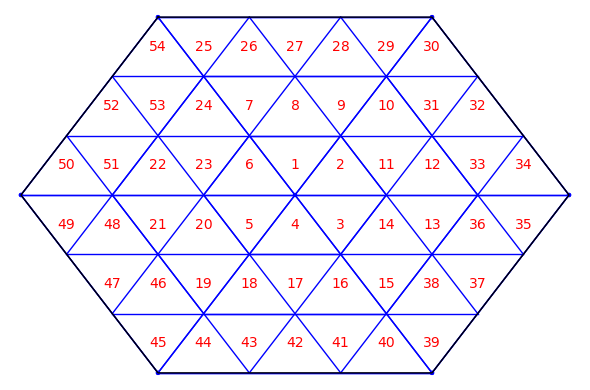

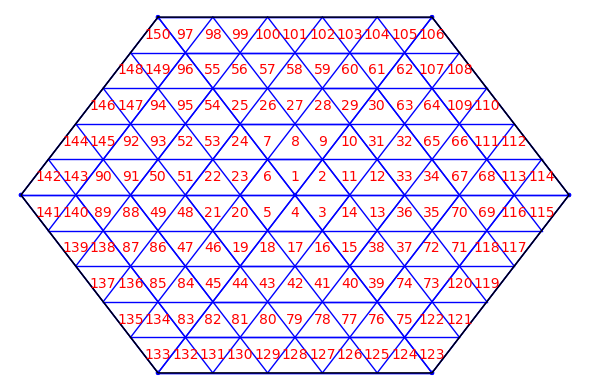

In [12]:
def mul_pt(pt1, x):
	return (pt1[0] * x, pt1[1] * x)

def draw_hexagon(n = 5, numbers = true):
	hex_pts = [(-n/2, n/2 * sqrt(3)), (n/2, n/2 * sqrt(3)), (n, 0), (n/2, -n/2 * sqrt(3)), (-n/2, -n/2 * sqrt(3)), (-n, 0), (-n/2, n/2 * sqrt(3))]
	hexplot = point((0, 0))

	# draw triangle outlines
	for i in range(len(hex_pts) - 1):
		pt0 = hex_pts[len(hex_pts) - 2 if i == 0 else i - 1]
		pt1 = hex_pts[i]
		pt2 = hex_pts[i + 1]
		pt3 = hex_pts[1 if i == len(hex_pts) - 2 else i + 2]

		step = div_pt(sub_pts(pt2, pt1), n)
		parline1 = [pt1, pt0]
		parline2 = [pt1, add_pts(pt1, sub_pts(pt3, pt2))]

		hexplot += point(pt0)
		hexplot += point(pt1)
		for j in range(n + 1):
			hexplot += line(parline1)
			parline1 = [add_pts(parline1[0], step), add_pts(parline1[1], step)]
			hexplot += line(parline2)
			parline2 = [add_pts(parline2[0], step), add_pts(parline2[1], step)]

			pt1 = add_pts(pt1, step)

	# draw hexagon itself
	hexplot += line(hex_pts, rgbcolor = (0, 0, 0))

	cur_num = 1
	if numbers:
		# draw triangle numbers
		for i in range(n):
			# 1
			pt_start = div_pt(sub_pts(hex_pts[1], hex_pts[2]), n)
			pt = add_pts(mul_pt(pt_start, i + 1), (0.5, -1/4 * sqrt(3)))
			step = (0.5, 0)
			for j in range(1 + 2*i):
				hexplot += text(str(cur_num), pt, rgbcolor = (1, 0, 0))
				pt = add_pts(pt, step)
				cur_num += 1
			# 2
			pt_start = div_pt(sub_pts(hex_pts[2], hex_pts[3]), n)
			pt = add_pts(mul_pt(pt_start, i + 1), (0, -1/4 * sqrt(3)))
			step = (0, -1/2 * sqrt(3))
			step2 = (0.5, 0)
			for j in range(1 + 2*i):
				hexplot += text(str(cur_num), pt, rgbcolor = (1, 0, 0))
				if j % 2 == 0:                
					pt = add_pts(pt, step)
				else:
					pt = add_pts(pt, step2)
				cur_num += 1
			# 3
			pt_start = (1, 0)
			pt = add_pts(mul_pt(pt_start, i + 1), (-0.5, -1/4 * sqrt(3)))
			step = (-0.5, 0)
			step2 = (0, -1/2 * sqrt(3))
			for j in range(1 + 2*i):
				hexplot += text(str(cur_num), pt, rgbcolor = (1, 0, 0))
				if j % 2 == 0:                
					pt = add_pts(pt, step)
				else:
					pt = add_pts(pt, step2)
				cur_num += 1
			# 4
			pt_start = div_pt(sub_pts(hex_pts[2], hex_pts[1]), n)
			pt = add_pts(mul_pt(pt_start, i + 1), (-0.5, 1/4 * sqrt(3)))
			step = (-0.5, 0)
			for j in range(1 + 2*i):
				hexplot += text(str(cur_num), pt, rgbcolor = (1, 0, 0))                    
				pt = add_pts(pt, step)
				cur_num += 1
			# 5
			pt_start = div_pt(sub_pts(hex_pts[3], hex_pts[2]), n)
			pt = add_pts(mul_pt(pt_start, i + 1), (0, 1/4 * sqrt(3)))
			step = (0, 1/2 * sqrt(3))
			step2 = (-0.5, 0)
			for j in range(1 + 2*i):
				hexplot += text(str(cur_num), pt, rgbcolor = (1, 0, 0))            
				if j % 2 == 0:                
					pt = add_pts(pt, step)
				else:
					pt = add_pts(pt, step2)
				cur_num += 1
			# 6
			pt_start = (-1, 0)
			pt = add_pts(mul_pt(pt_start, i + 1), (0.5, 1/4 * sqrt(3)))
			step = (0.5, 0)
			step2 = (0, 1/2 * sqrt(3))
			for j in range(1 + 2*i):
				hexplot += text(str(cur_num), pt, rgbcolor = (1, 0, 0))            
				if j % 2 == 0:                
					pt = add_pts(pt, step)
				else:
					pt = add_pts(pt, step2)
				cur_num += 1

	return hexplot

draw_hexagon(3).show(axes = False)
draw_hexagon(5).show(axes = False)

Теперь найдём количество независимых циклов в перестановках $g \in G$ для каждого случая $n$.

Очевидно, $|X^e| = 6(n-1)^2 + 12(n-1) + 6$.

Отражения относительно оси симметрии OY $\sigma$ будет выглядеть следующим образом:
$\begin{pmatrix}
1 & 2 & 3 & 4 & 5 & 6 & 7 & ...\\
1 & 6 & 5 & 4 & 3 & 2 & 9 & ... 
\end{pmatrix}$

Если описать $\sigma$ в общем виде, разложив на произведение независимых циклов, то получится произведение двух типов циклов:
1. Циклы длины 1 - для треугольников, лежащих на оси OY. Таких циклов будет два для каждой "полосы" треугольников, т.е. $2n$.
2. Циклы длины 2 - для всех остальных треугольников, которые меняются местами друг с другом. Таких циклов будет ${{6(n-1)^2 + 12(n-1) + 6 - 2n} \over {2}} = 3n^2 - n$.

Таким образом, $|X^\sigma| = 3n^2 + n$.

Поворот на 60 градусов по часовой стрелке $\tau$ будет выглядеть следующим образом:
$\begin{pmatrix}
1 & 2 & 3 & 4 & 5 & 6 & 7  & ...\\
6 & 1 & 2 & 3 & 4 & 1 & 24 & ...
\end{pmatrix}$

В общем виде $\tau$ можно представить как произведение сдвигов "полос" треугольников на $2i - 1$ позиций, где $i$ - номер "полосы", начиная с внутренней: $1 \le i \le n$. Таким обазом, количество независимых циклов для $i$-ой полосы равно $2i - 1$.

Таким образом, $|X^\tau| = \sum_{i=1}^n (2i - 1) = n^2 + n - n = n^2$.

Можно заметить, что два поворота на 60 градусов (или один на 120 градусов) $\tau^2$ будут представлять собой сдвиг "полос" треугольников на $4i - 2$ позиций, и таким образом
$$|X^{\tau^2}| = \sum_{i=1}^n (4i - 2) = 2\sum_{i=1}^n (2i - 1) = 2n^2.$$

Аналогично $|X^{\tau^3}| = 3n^2.$

Однако, $\tau^4 = (\tau^2)^{-1}$ и $\tau^5 = (\tau)^{-1}$, из чего следует, что
$$|X^{\tau^4}| = 2n^2,\\
|X^{\tau^5}| = n^2.$$

Далее, для композиций поворотов и отражения $\sigma\tau, \sigma\tau^2, ...$ можно заметить, что при нечётной степени $\tau$ отражение создаёт независимые циклы длины 2, при этом те элементы, которые оно не трогает, по-прежнему изменяются за счёт поворота, и таким образом, тоже входят в цикл длины 2. При чётной же степени $\tau$ по два элемента в каждой "полосе" треугольников в результате отражения окажутся на исходном месте (это будут элементы $6i^2 - 6i + 4$ и $6(i−1)2+12(i−1)+6$), так что количество независимых циклов будет совпадать с таковым у $\sigma$.

Таким образом,

$$|X^{\sigma\tau}| = |X^{\sigma\tau^3}| = |X^{\sigma\tau^5}| = 3n^2,$$
$$|X^{\sigma\tau^2}| = |X^{\sigma\tau^4}| = |X^\sigma| = 3n^2 + n.$$

Воспользуемся леммой Бёрнсайда, чтобы получить конечный ответ:
$$ N = {1 \over {|G|}} \sum_{g \in G} |X^g| = {1 \over 12} (4^{6(n-1)^2 + 12(n-1) + 6} + 4^{3n^2 + n} + 4^{n^2} + 4^{2n^2} + 4^{3n^2} + 4^{2n^2} + 4^{n^2} + 4^{3n^2} + 4^{3n^2 + n} + 4^{3n^2} + 4^{3n^2 + n} + 4^{3n^2}) = $$
$$= {1 \over 12} (2\cdot4^{n^2} + 2\cdot4^{2n^2} + 4^{3n^2 + 1} + 3\cdot4^{3n^2 + n} + 4^{6n^2}).$$

**Ответ:** Количество уникальных раскрасок шестиугольника, каждая сторона которого поделена на **n** частей, через которые проведены линии, параллельные другим сторонам треугольника, равно
$${1 \over 12} (2\cdot4^{n^2} + 2\cdot4^{2n^2} + 4^{3n^2 + 1} + 3\cdot4^{3n^2 + n} + 4^{6n^2})$$

## Вывод
В ходе выполнения данной практической работы были сформированы представления о задачах о раскрасках, были выроботаны умения использования леммы Бёрнсайда и перестановок для решения задач о раскрасках, был привит навык использования систем компьютерной алгебры для реализации алгоритмов решения данной задачи о раскрасках.